In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingHongKong.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,1496,2012-05-15,Hong Kong,22.287712,114.148821,3.0,1.0,1.0,1.0,783.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5
1,1497,2015-08-01,Hong Kong,22.283885,114.152385,1.0,1.0,1.0,1.0,419.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,8
2,1500,2014-07-18,Hong Kong,22.285347,114.135652,2.0,1.0,1.0,2.0,597.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,7
3,1505,2013-10-23,Hong Kong,22.281775,114.150101,2.0,2.0,1.0,2.0,597.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,10
4,1506,2012-01-18,Hong Kong,22.283353,114.141766,2.0,1.0,1.0,1.0,900.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,477560,2015-10-04,Hong Kong,22.213657,114.030004,2.0,1.0,1.0,1.0,349.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,10
3812,477561,2015-06-26,Hong Kong,22.222637,114.125651,6.0,1.0,1.0,2.0,737.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6
3813,477562,2015-02-02,Hong Kong,22.292377,113.941549,6.0,1.0,2.0,3.0,737.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2
3814,477563,2014-10-11,Hong Kong,22.247663,113.979471,2.0,1.0,0.0,1.0,791.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,10


<AxesSubplot:ylabel='Frequency'>

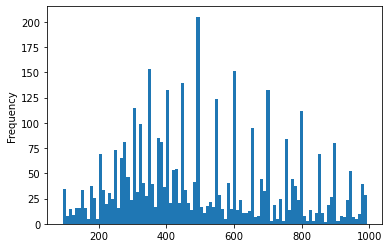

In [35]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [36]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 200, 400, 600, 800, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,1496,2012-05-15,Hong Kong,22.287712,114.148821,3.0,1.0,1.0,1.0,783.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5,group_4
1,1497,2015-08-01,Hong Kong,22.283885,114.152385,1.0,1.0,1.0,1.0,419.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,8,group_3
2,1500,2014-07-18,Hong Kong,22.285347,114.135652,2.0,1.0,1.0,2.0,597.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,7,group_3
3,1505,2013-10-23,Hong Kong,22.281775,114.150101,2.0,2.0,1.0,2.0,597.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,10,group_3
4,1506,2012-01-18,Hong Kong,22.283353,114.141766,2.0,1.0,1.0,1.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,group_5


In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [38]:
train['group'].value_counts() / len(train)

group_2    0.315858
group_3    0.311927
group_4    0.201507
group_5    0.113041
group_1    0.057667
Name: group, dtype: float64

In [39]:
test['group'].value_counts() / len(test)

group_2    0.316754
group_3    0.311518
group_4    0.201571
group_5    0.112565
group_1    0.057592
Name: group, dtype: float64

In [40]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
1386,205189,2012-09-28,Hong Kong,22.313877,114.169930,2.0,1.5,1.0,1.0,318.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,9
1608,223089,2013-08-29,Hong Kong,22.288168,114.146774,6.0,2.0,3.0,4.0,853.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,8
509,42978,2015-01-09,Hong Kong,22.298985,114.174504,2.0,1.0,1.0,2.0,496.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1
457,42854,2013-12-11,Hong Kong,22.266451,113.994302,4.0,1.0,1.0,2.0,551.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,12
3100,401653,2015-01-09,Hong Kong,22.329810,114.159679,2.0,2.0,1.0,1.0,132.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1


In [41]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
1063,22.214576,114.028581,2.0,1.0,1.0,1.0,450.0,1.0,0.0,1.0,1125.0,2.0,0.0,1.0,0.0,1,10
316,22.319218,114.188650,1.0,2.0,1.0,1.0,225.0,1.0,0.0,1.0,1125.0,66.0,0.0,0.0,1.0,6,11
3594,22.274568,114.194435,1.0,1.0,1.0,1.0,473.0,1.0,0.0,1.0,1125.0,2.0,0.0,1.0,0.0,1,7
3314,22.288137,114.144479,4.0,1.0,1.0,1.0,737.0,2.0,150.0,2.0,1125.0,9.0,1.0,0.0,0.0,6,3
183,22.282374,114.191717,3.0,1.0,1.0,2.0,651.0,1.0,0.0,3.0,1125.0,12.0,1.0,0.0,0.0,0,1


In [42]:
train_y = train[['Price']]
train_y.head()

,Price
1386,318.0
1608,853.0
509,496.0
457,551.0
3100,132.0


In [43]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
1386,22.313877,114.169930,2.0,1.5,1.0,1.0,2.0,0.0,1.0,1000.0,56.0,0.0,1.0,0.0,4,9
1608,22.288168,114.146774,6.0,2.0,3.0,4.0,4.0,80.0,3.0,365.0,52.0,1.0,0.0,0.0,3,8
509,22.298985,114.174504,2.0,1.0,1.0,2.0,2.0,50.0,1.0,1125.0,42.0,0.0,1.0,0.0,4,1
457,22.266451,113.994302,4.0,1.0,1.0,2.0,2.0,300.0,2.0,1125.0,70.0,1.0,0.0,0.0,2,12
3100,22.329810,114.159679,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1125.0,9.0,0.0,1.0,0.0,4,1


In [44]:
test_y= test[['Price']]
test_y.head()

,Price
1063,450.0
316,225.0
3594,473.0
3314,737.0
183,651.0


In [45]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
1063,22.214576,114.028581,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,2.0,0.0,1.0,0.0,1,10
316,22.319218,114.188650,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1125.0,66.0,0.0,0.0,1.0,6,11
3594,22.274568,114.194435,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,2.0,0.0,1.0,0.0,1,7
3314,22.288137,114.144479,4.0,1.0,1.0,1.0,2.0,150.0,2.0,1125.0,9.0,1.0,0.0,0.0,6,3
183,22.282374,114.191717,3.0,1.0,1.0,2.0,1.0,0.0,3.0,1125.0,12.0,1.0,0.0,0.0,0,1


In [46]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [48]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [49]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [50]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [51]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [52]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [53]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [54]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [55]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [56]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [57]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [58]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [59]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [60]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [61]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_18636/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

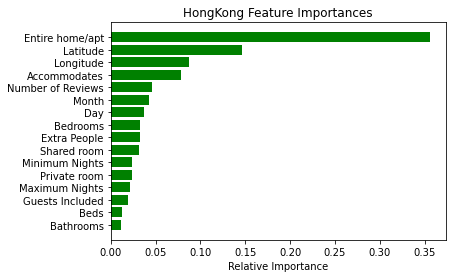

In [62]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('HongKong Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [63]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

2549.2761355504585 50.490356857032204 37.19730996068152


In [64]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [65]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [66]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)